<a href="https://colab.research.google.com/github/MouniriOuma/TP-Neural-Network-Regression-Model-for-Predicting-MEDV/blob/main/TP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras import models, layers

In [ ]:
# Charger le dataset
data = pd.read_csv("TP6_dataset.csv")

# Afficher un aperçu des données
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  LSTAT  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   4.98   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   9.14   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   4.03   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   2.94   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   5.33   

   MEDV  
0  24.0  
1  21.6  
2  34.7  
3  33.4  
4  36.2  


In [ ]:
# Séparer les caractéristiques (X) et la cible (y)
X = data.drop("MEDV", axis=1).values  # Variables indépendantes
y = data["MEDV"].values  # Variable dépendante

In [ ]:
# Standardiser les caractéristiques
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
# Diviser en entraînement + validation (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diviser l'ensemble d'entraînement en entraînement (70%) et validation (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
# Définir le modèle
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Pas d'activation pour une sortie continue
])

C:\Users\Mouma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
# Entraîner le modèle
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 553.1251 - mae: 21.8064 - val_loss: 508.9363 - val_mae: 20.8325
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 530.6409 - mae: 21.0588 - val_loss: 452.8512 - val_mae: 19.5133
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 448.0163 - mae: 19.3504 - val_loss: 378.9532 - val_mae: 17.6382
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 359.7219 - mae: 16.9595 - val_loss: 288.8479 - val_mae: 14.9557
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 273.3240 - mae: 14.4064 - val_loss: 194.6305 - val_mae: 11.7307
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 216.7404 - mae: 11.8193 - val_loss: 122.1202 - val_mae: 8.8530
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 123.5320 - mae: 8.2927 - val_loss: 89.8440 - val_mae: 7.1756
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 107.0207 - mae: 7.9402 - val_loss: 72.8028 - val_mae: 6.3968
Epoch 9/100
9/9 ━━━━━━━━━━━━━

In [ ]:
# Évaluer le modèle sur les données de test
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"MAE sur les données de test : {test_mae:.2f}")

MAE sur les données de test : 2.32


In [ ]:
# Prédire les prix sur l'ensemble de test
y_pred = model.predict(X_test).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [ ]:
# Calculer la MSE et le R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE : {mse:.2f}")
print(f"R-squared : {r2:.2f}")


MSE : 11.94
R-squared : 0.84


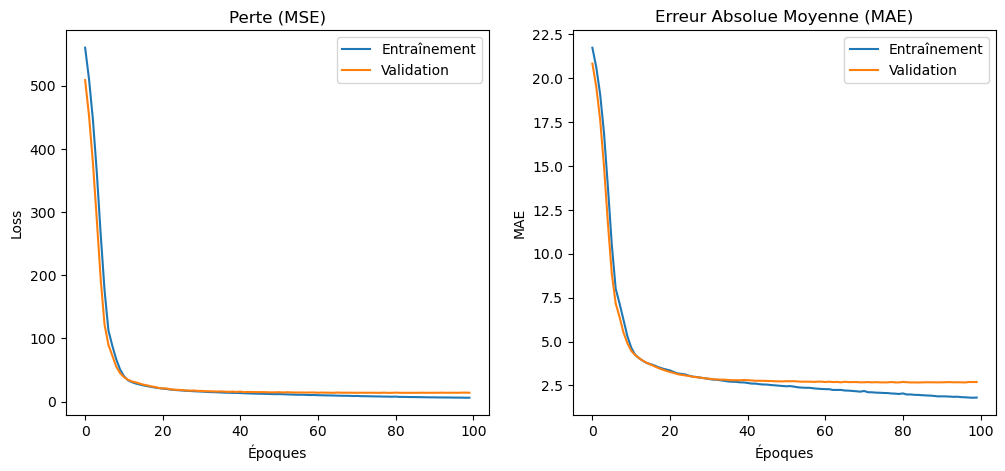

In [ ]:
# Courbe de perte (MSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Perte (MSE)")
plt.xlabel("Époques")
plt.ylabel("Loss")
plt.legend()

# Courbe de MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Entraînement')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Erreur Absolue Moyenne (MAE)")
plt.xlabel("Époques")
plt.ylabel("MAE")
plt.legend()
plt.show()
